In [251]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import scipy.signal as signal



# This notebook details an experiment conducted with the HB100 JYVA2 Veroboard setup on firth road 

# Medium Sized Car Driving Past Radar Pointing Directly Across the Road

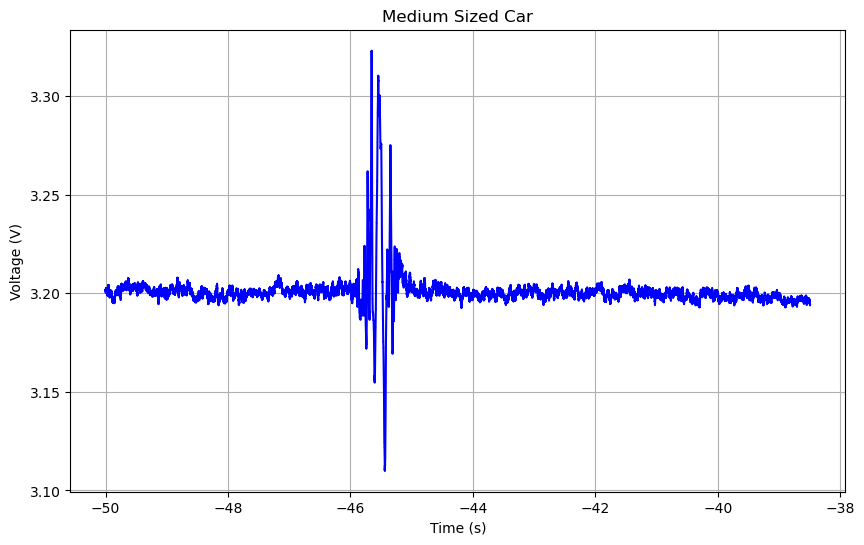

In [252]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('MediumSizedCar20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#voltage_data = voltage_data[60000:100000]
#time_data = time_data[60000:100000]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Medium Sized Car')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

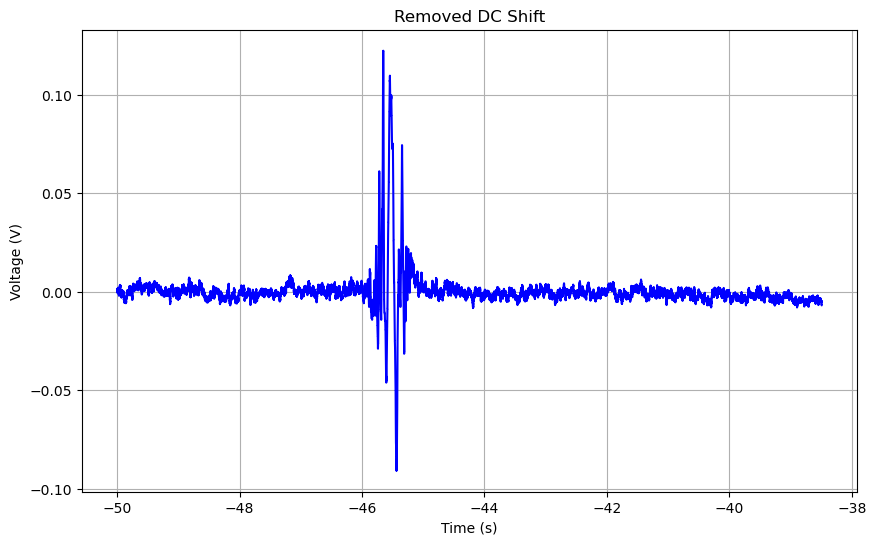

In [253]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Downsampling to 1khz by averaging extra samples

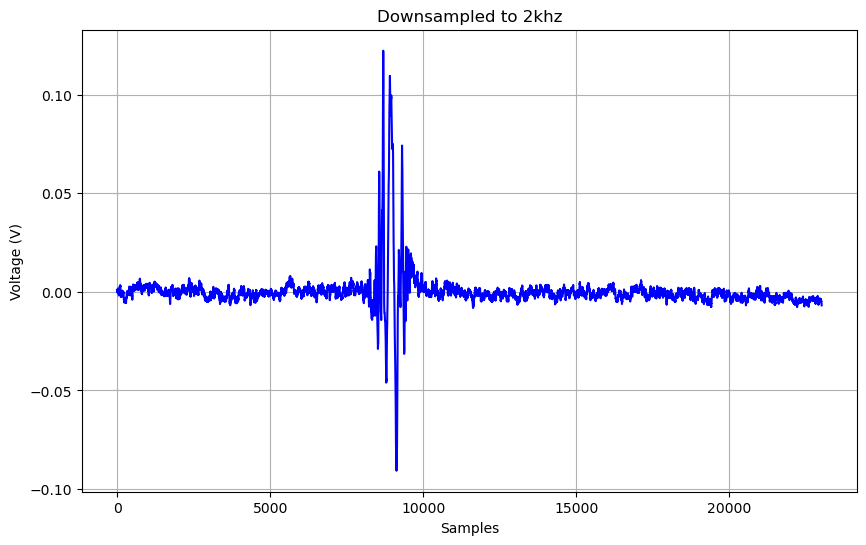

In [254]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Plotting Spectrogram

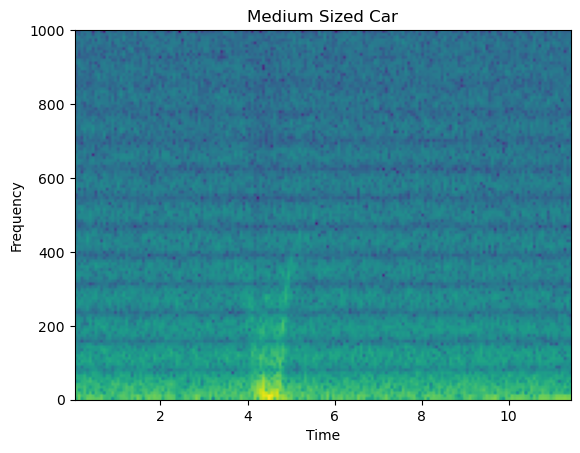

In [255]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# # Define the scaling factor
# scaling_factor = 1 / 19.49

# # Define a custom y-axis formatter function
# def custom_formatter(x, pos):
#     # Scale the y-axis labels by dividing by the scaling factor
#     scaled_value = x * scaling_factor
#     return f'{scaled_value:.2f}'  # Format the label with two decimal places

# # Create a custom y-axis formatter
# formatter = FuncFormatter(custom_formatter)

# #Apply the custom formatter to the y-axis
# plt.gca().yaxis.set_major_formatter(formatter)

#plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Medium Sized Car')

plt.show()


# Plotting DTFT

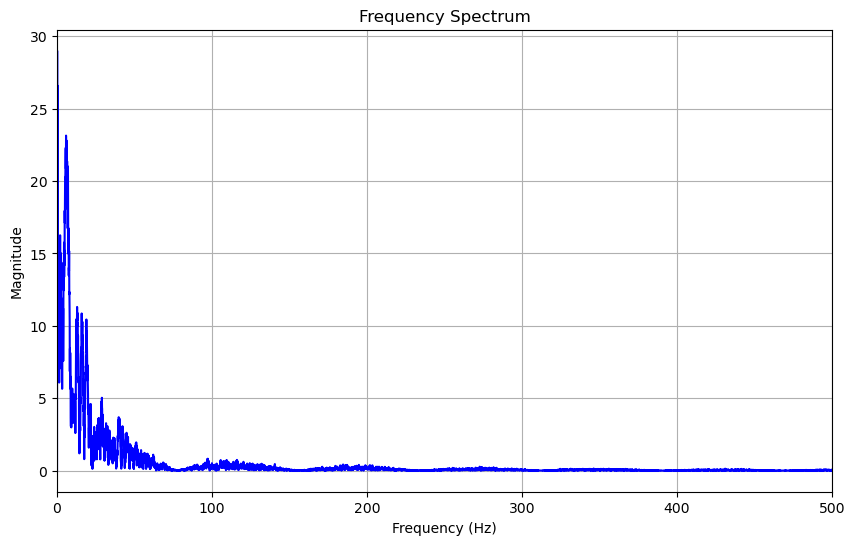

In [256]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Large Car Moving Very Slowly

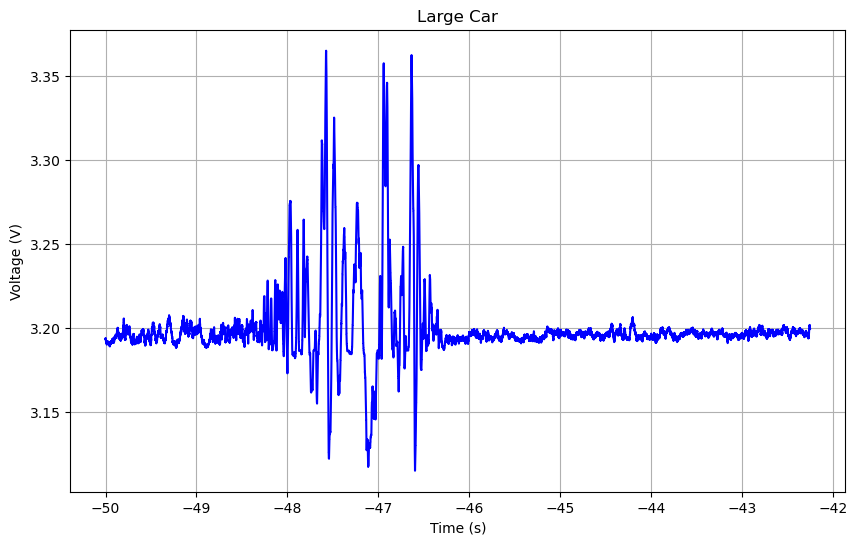

In [257]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('LargeCar20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#voltage_data = voltage_data[200000:]
#time_data = time_data[200000:]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Large Car')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

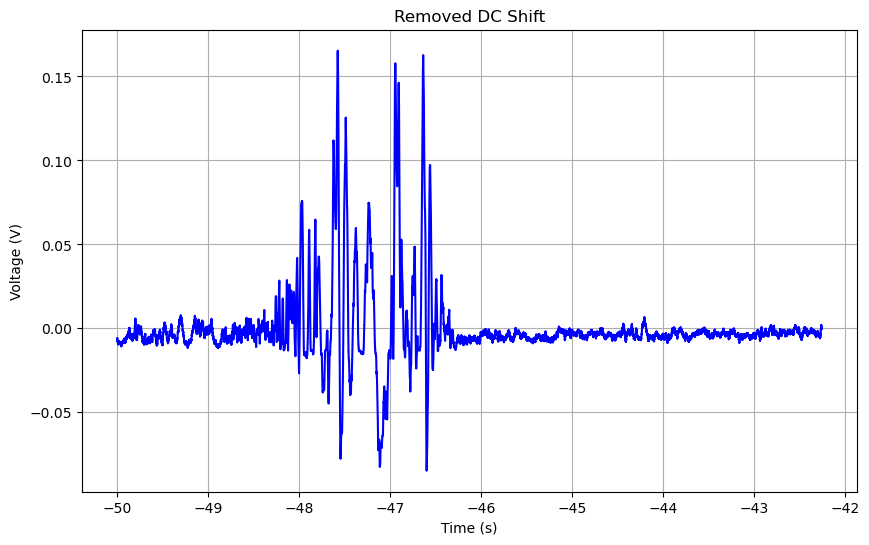

In [258]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Downsampling

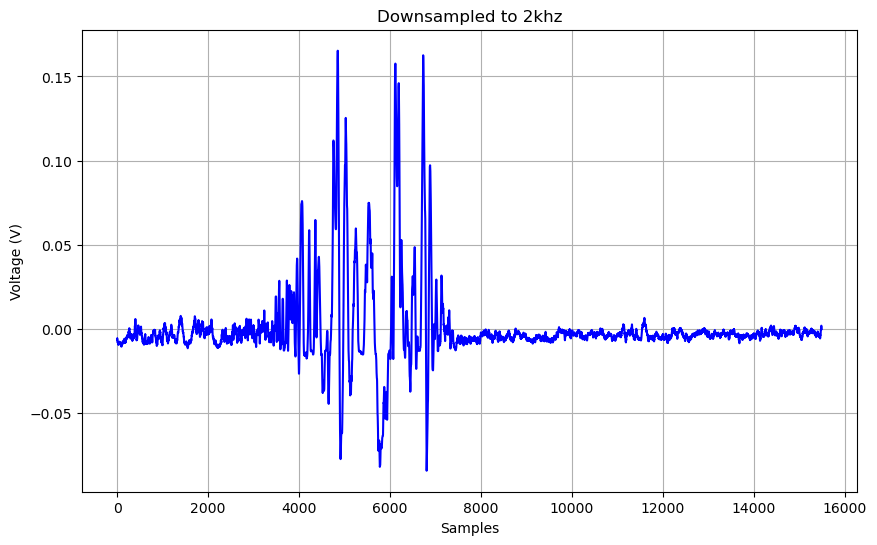

In [259]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Plotting Spectrogram

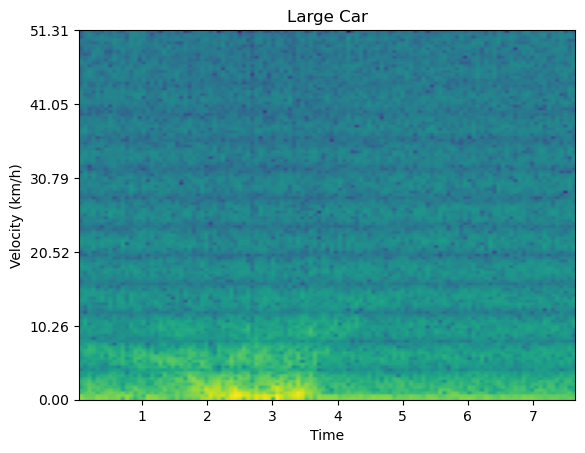

In [260]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (km/h)')
plt.title('Large Car')

plt.show()


# Audi A1 Moving Very Quickly

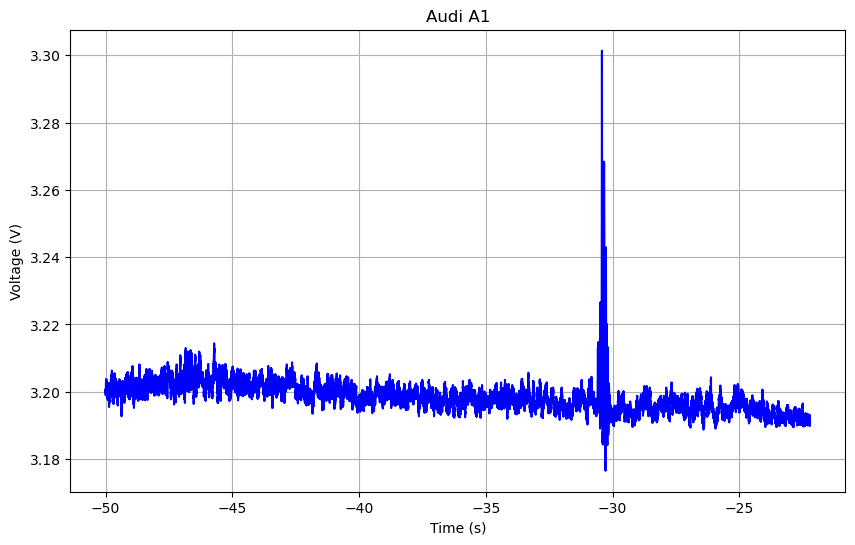

In [261]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('AudiA120khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#voltage_data = voltage_data[200000:]
#time_data = time_data[200000:]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Audi A1')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

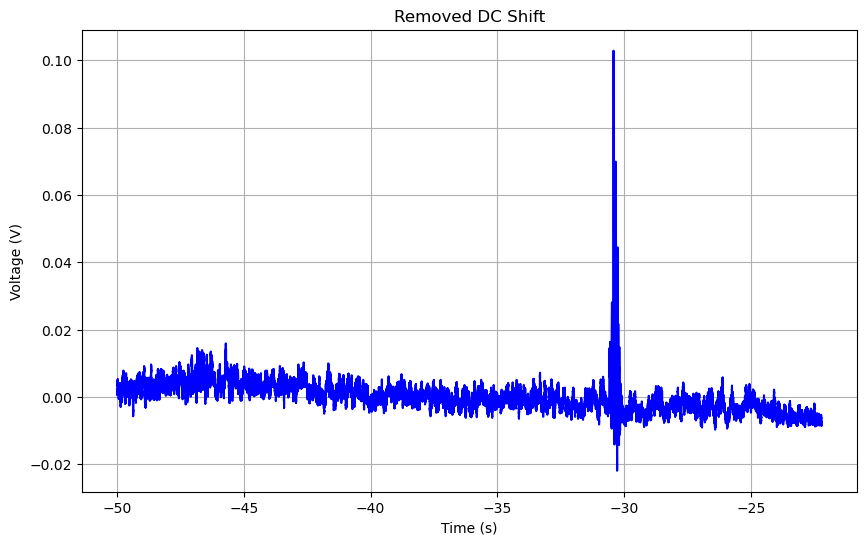

In [262]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Downsampling

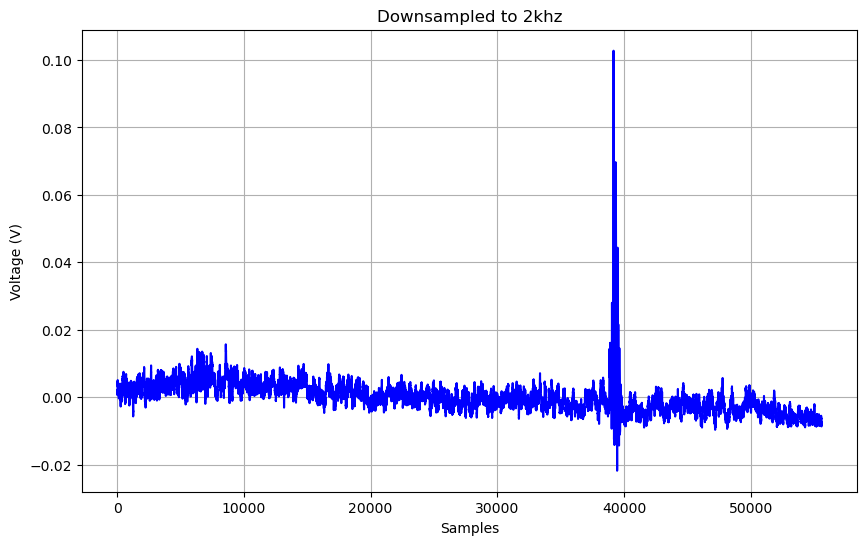

In [263]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Plotting Spectrogram

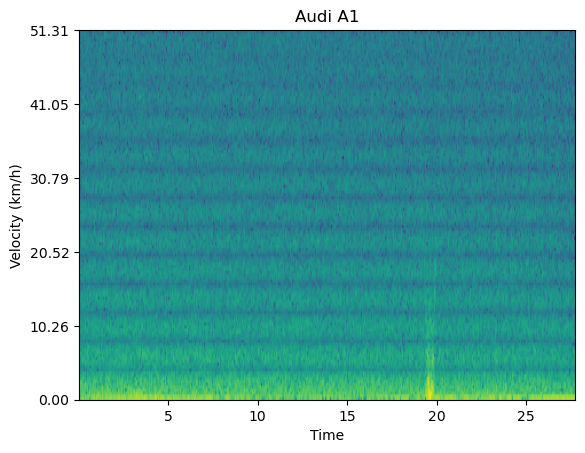

In [264]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (km/h)')
plt.title('Audi A1')

plt.show()
